## 포스트 코로나 시대의 경제 상황을 국민연금 가입자 오픈데이터를 통해 알아보자?!!

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


- 데이터셋: 공공 데이터 포털
- 형태: 파일데이터 (csv)
- 다운로드: https://www.data.go.kr/data/3046071/fileData.do

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [10]:
df = pd.read_csv('national_pension_20200824.csv', encoding='cp949')

In [64]:
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,시군구코드,읍면동코드,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉
0,202007,우성기전,126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0.00,0.00,158544.00,1761600.00,21139200.00
1,202007,서능공원묘지운영회,102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0.00,0.00,252189.23,2802102.56,33625230.77
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,19880101,10101,10101,14,4839540,0.00,1.00,345681.43,3840904.76,46090857.14
3,202007,유창성업,122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,260,119,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0.00,0.00,199123.57,2212484.13,26549809.52
4,202007,희성전자,106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,170,131,1,701201,비주거용 건물 임대업(점포 자기땅),19880101,10101,10101,496,208935540,0.00,2.00,421241.01,4680455.65,56165467.74


## Column 정리 (Clean)

In [66]:
df.columns

Index(['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드',
       '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', '적용일',
       '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실', '인당고지금액', '평균월급', '평균연봉'],
      dtype='object')

In [58]:
'''
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', '적용일',
           '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실', '인당고지금액', '평균월급', '평균연봉']
         ]
'''

In [65]:
len(df.columns)

25

In [63]:
#len(columns)

22

In [ ]:
#df.columns = columns

In [ ]:
#df.head()

## 핵심 데이터 column 추출

In [69]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액','인당고지금액', '평균월급', '평균연봉']]

In [75]:
df_main.head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
0,우성기전,5,0.00,0.00,792720,158544.00,1761600.00,21139200.00
1,서능공원묘지운영회,13,0.00,0.00,3278460,252189.23,2802102.56,33625230.77
2,노들새마을금고,14,0.00,1.00,4839540,345681.43,3840904.76,46090857.14
3,유창성업,28,0.00,0.00,5575460,199123.57,2212484.13,26549809.52
4,희성전자,496,0.00,2.00,208935540,421241.01,4680455.65,56165467.74
5,동성교역,5,0.00,0.00,1337460,267492.00,2972133.33,35665600.00
6,태평양그랜드,27,3.00,1.00,6672940,247145.93,2746065.84,32952790.12
7,SK건설,4465,36.00,27.00,1907884800,427297.83,4747753.64,56973043.67
8,태영건설,1409,39.00,23.00,593108500,420942.87,4677142.97,56125715.64
9,정하건설,11,0.00,0.00,1843440,167585.45,1862060.61,22344727.27


## 데이터 통계

In [20]:
df_main['신규'].mean()

0.7042091441554418

In [21]:
df_main['상실'].mean()

0.6895560702851832

In [22]:
df_main['가입자수'].mean()

24.838813712356817

In [23]:
df_main['고지금액'].mean()

7363608.070630204

## 월급, 연봉 추정

In [24]:
(df_main['고지금액'] / df_main['가입자수']).head()

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
dtype: float64

In [25]:
df_main['인당고지금액'] = df_main['고지금액'] / df_main['가입자수']
df['인당고지금액'] = df['고지금액'] / df['가입자수']

In [26]:
df_main['인당고지금액'].head()

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
Name: 인당고지금액, dtype: float64

**국민연금 정보로 어떻게 연봉정보를 계산하나요?**


국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 임직원 평균 월급 = 인당고지금액 / 9% * 100%
- 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [27]:
df_main['평균월급'] = df_main['인당고지금액'] / 9 * 100
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [28]:
df_main['평균연봉'] = df_main['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [29]:
df_main['평균월급'].notnull().sum()

336152

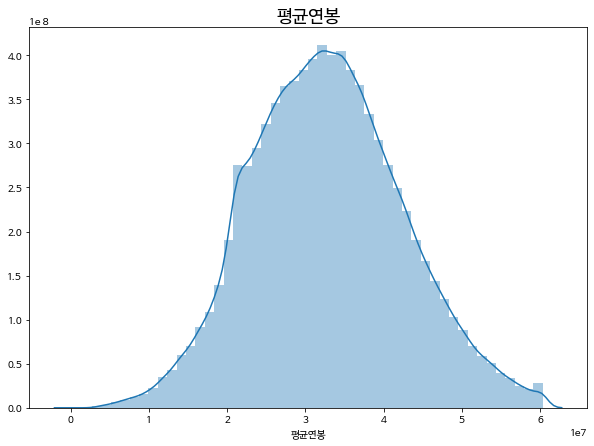

In [30]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()

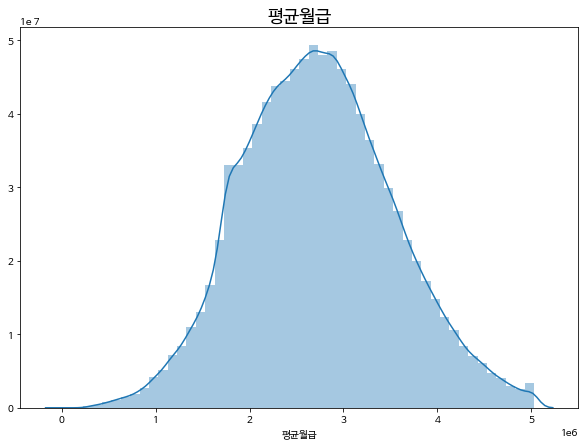

In [31]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균월급'].notnull(), '평균월급'])
plt.title('평균월급', fontsize=18)
plt.show()

## 정렬(Order)

### 연봉 King!

In [77]:
df_main.sort_values(by='평균연봉', ascending=False).head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
306148,제이켐,3,0.00,0.00,1358100,452700.00,5030000.00,60360000.00
56028,갤럭시티디씨,4,0.00,0.00,1810800,452700.00,5030000.00,60360000.00
13002,심텍홀딩스서울지점,3,0.00,0.00,1358100,452700.00,5030000.00,60360000.00
206506,한국인삼공사-대전,25,0.00,0.00,11317500,452700.00,5030000.00,60360000.00
189772,에이스컴,3,0.00,1.00,1358100,452700.00,5030000.00,60360000.00
228142,인천광역시소방본부-구급상황관리센터,4,0.00,0.00,1810800,452700.00,5030000.00,60360000.00
137251,이엠씨솔루션,5,0.00,0.00,2263500,452700.00,5030000.00,60360000.00
218715,대조제1구역주택재개발정비사업조합,4,0.00,0.00,1810800,452700.00,5030000.00,60360000.00
54385,제이앰코퍼레이션,3,0.00,0.00,1358100,452700.00,5030000.00,60360000.00
73688,한올테크,6,0.00,0.00,2716200,452700.00,5030000.00,60360000.00


### 신규 채용 King!

In [78]:
df_main.sort_values(by='신규', ascending=False).head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
253925,쿠팡,13835,1678.00,915.00,3925868620,283763.54,3152928.26,37835139.09
5288,스타벅스커피코리아,17087,1279.00,518.00,3063022300,179260.39,1991782.12,23901385.46
62951,인터파크,1222,1186.00,36.00,364521140,298298.81,3314431.17,39773174.03
47417,한국맥도날드유한회사,8288,1066.00,886.00,830463700,100200.74,1113341.51,13360098.13
139505,씨에스원 파트너,1730,1061.00,73.00,428084540,247447.71,2749419.01,32993028.13
157341,대원고속,2270,911.00,17.00,811480180,357480.26,3972002.84,47664034.07
157398,경기고속,2308,869.00,26.00,836458800,362417.16,4026857.31,48322287.69
5602,유베이스,10074,805.00,703.00,1834227240,182075.37,2023059.63,24276715.51
2872,대림건설,1581,722.00,36.00,612514240,387422.04,4304689.30,51656271.56
231977,제니엘시스템,741,719.00,388.00,106531920,143767.77,1597419.70,19169036.44


### 상실 King!

In [79]:
df_main.sort_values(by='상실', ascending=False).head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
253925,쿠팡,13835,1678.00,915.00,3925868620,283763.54,3152928.26,37835139.09
47417,한국맥도날드유한회사,8288,1066.00,886.00,830463700,100200.74,1113341.51,13360098.13
4519,모두투어네트워크,867,240.00,760.00,195684780,225703.32,2507814.69,30093776.24
5602,유베이스,10074,805.00,703.00,1834227240,182075.37,2023059.63,24276715.51
166824,진주시청,1080,69.00,583.00,177969640,164786.70,1830963.37,21971560.49
6730,푸르지오서비스,555,10.00,555.00,161555240,291090.52,3234339.14,38812069.67
4634,삼성전자,103139,485.00,538.00,45835633380,444406.42,4937849.07,59254188.85
86874,제니엘,5772,313.00,519.00,1038855780,179981.94,1999799.38,23997592.52
5288,스타벅스커피코리아,17087,1279.00,518.00,3063022300,179260.39,1991782.12,23901385.46
235976,비케이알,3827,511.00,510.00,387012360,101126.83,1123631.39,13483576.69


## 300인 이하 기업

In [80]:
people_limit = 300

In [81]:
small = df_main.loc[(df_main['가입자수'].notnull()) & (df_main['가입자수'] < people_limit)]

In [82]:
small['가입자수'].isnull().sum()

0

### 300인 이하 기업의 분포도

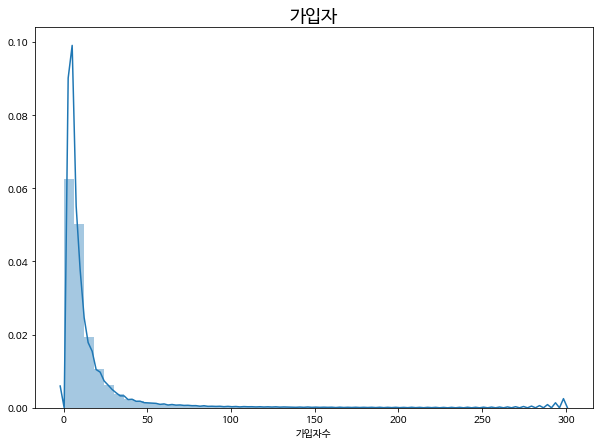

In [83]:
plt.figure(figsize=(10, 7))
sns.distplot(small['가입자수'])
plt.title('가입자', fontsize=18)
plt.show()

### 300인 이하 기업 중 상실 King!!

In [85]:
small.sort_values(by='상실', ascending=False).head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
319922,대구시청/교육협력정책관,277,0.00,277.00,12089720,43645.20,484946.65,5819359.81
36026,서구청 경제과,252,4.00,246.00,30881700,122546.43,1361626.98,16339523.81
142713,엔에이치엔여행박사,243,2.00,226.00,60002900,246925.51,2743616.83,32923401.92
182068,달성군청 공공근로4단계,197,0.00,196.00,20389500,103500.00,1150000.00,13800000.00
201210,안양시환경사업소,182,0.00,172.00,67838920,372741.32,4141570.21,49698842.49
295864,남양주시,158,33.00,158.00,18621000,117854.43,1309493.67,15713924.05
301859,에코라인,181,0.00,146.00,43517520,240428.29,2671425.41,32057104.97
36120,동구청 경제과 공공근로사업,139,2.00,137.00,13536440,97384.46,1082049.56,12984594.72
116404,신용보증재단중앙회,259,16.00,133.00,67827580,261882.55,2909806.09,34917673.10
182335,성동돌봄센터,160,4.00,131.00,22481160,140507.25,1561191.67,18734300.00


## 사업장명 데이터 정제 (Cleansing)

In [86]:
import re

# 괄호안 문자열 제거
pattern_1 = '\(.*\)'
pattern_2 = '\（.*\）'
pattern_3 = '주식회사'

### (주), (주식회사) 문자열 제거

In [87]:
re.sub(pattern_1, '', '브레인크루(주)')

'브레인크루'

In [88]:
re.sub(pattern_1, '', '브레인크루(주식회사)')

'브레인크루'

In [89]:
re.sub(pattern_1, '', '(주)브레인크루')

'브레인크루'

In [90]:
re.sub(pattern_2, '', '（주）타워홀딩스')

'타워홀딩스'

### 주식회사 문자열 제거

In [45]:
re.sub(pattern_3, '', '브레인크루 주식회사')

'브레인크루 '

In [46]:
re.sub(pattern_3, '', '브레인크루주식회사')

'브레인크루'

In [47]:
re.sub(pattern_3, '', '주식회사브레인크루주식회사')

'브레인크루'

### 실제 테이블에서 주식회사 문자열 제거

In [91]:
def text_preprocess(text):
    text = re.sub(pattern_1, '', text)
    text = re.sub(pattern_2, '', text)
    text = re.sub(pattern_3, '', text)
    return text

In [92]:
df_main['사업장명'] = df_main['사업장명'].apply(text_preprocess)

In [93]:
df_main[df_main['사업장명'] == '엔에이치엔여행박사']

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
142713,엔에이치엔여행박사,243,2.00,226.00,60002900,246925.51,2743616.83,32923401.92


In [94]:
df['사업장명'] = df['사업장명'].apply(text_preprocess)

In [95]:
df.columns

Index(['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드',
       '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', '적용일',
       '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실', '인당고지금액', '평균월급', '평균연봉'],
      dtype='object')

##시군구 별 데이터

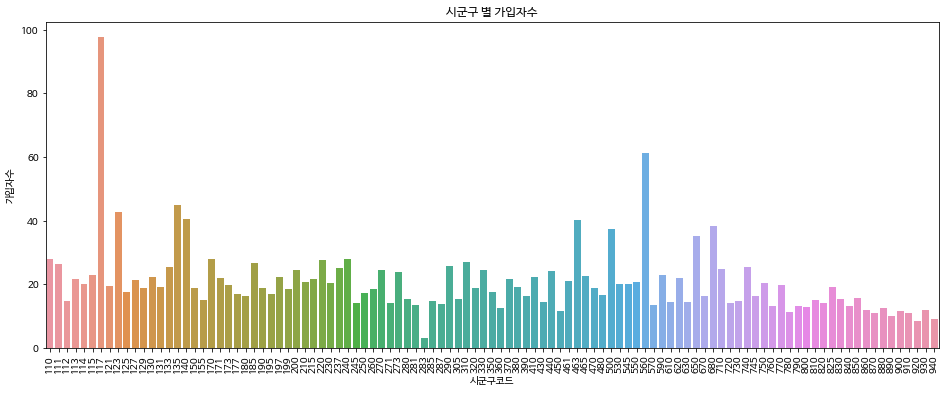

In [96]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['가입자수'].mean().index, y=df.groupby('시군구코드')['가입자수'].mean())
plt.title('시군구 별 가입자수')
plt.xticks(rotation=90)
plt.show()

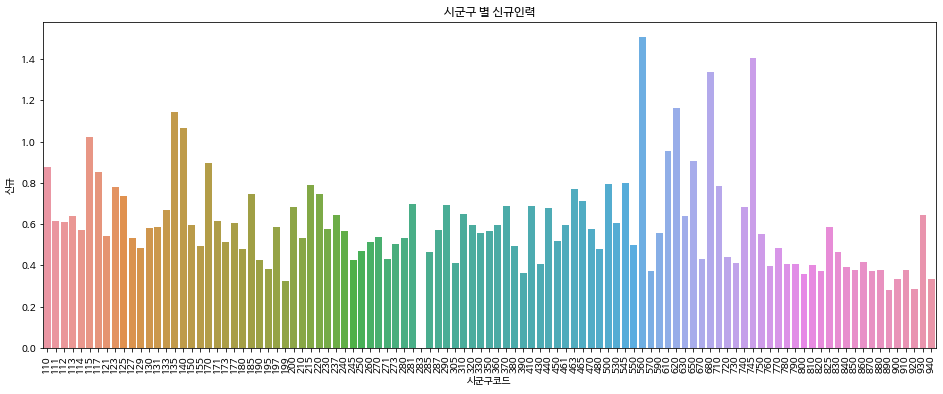

In [97]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['신규'].mean().index, y=df.groupby('시군구코드')['신규'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

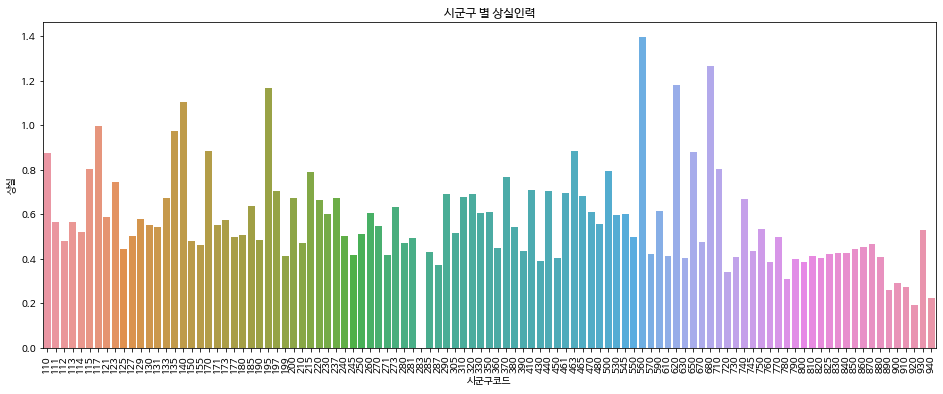

In [98]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['상실'].mean().index, y=df.groupby('시군구코드')['상실'].mean())
plt.title('시군구 별 상실인력')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

## 신규 인력이 많은 시군구코드

**서울시 영등포구**에서 최근 국민연금 가입자 평균 신규 및 상실 인력이 가장 많이 발생했음



In [101]:
df.loc[df['시군구코드'] == 560][['사업장명','지번주소','신규']].sort_values(by='신규', ascending=False).head(20)

,사업장명,지번주소,신규
3237,국민은행,서울특별시 영등포구 여의도동,550.00
62360,효성ITX,서울특별시 영등포구 양평동4가,423.00
14872,엘지전자,서울특별시 영등포구 여의도동,395.00
50923,에프에이모스트,서울특별시 영등포구 양평동3가,348.00
80024,윌앤비전,서울특별시 영등포구 당산동4가,235.00
12843,케이티아이에스,서울특별시 영등포구 여의도동,199.00
187476,발렉스서비스,서울특별시 영등포구 여의도동,196.00
51238,조은시스템,서울특별시 영등포구 문래동3가,169.00
4313,인터비즈시스템,서울특별시 영등포구 여의도동,156.00
11394,엘지화학,서울특별시 영등포구 여의도동,140.00


In [102]:
df.loc[df['시군구코드'] == 560][['사업장명','지번주소','상실']].sort_values(by='상실', ascending=False).head(20)

,사업장명,지번주소,상실
62360,효성ITX,서울특별시 영등포구 양평동4가,441.00
14872,엘지전자,서울특별시 영등포구 여의도동,419.00
12843,케이티아이에스,서울특별시 영등포구 여의도동,225.00
80024,윌앤비전,서울특별시 영등포구 당산동4가,208.00
11394,엘지화학,서울특별시 영등포구 여의도동,183.00
51238,조은시스템,서울특별시 영등포구 문래동3가,157.00
187476,발렉스서비스,서울특별시 영등포구 여의도동,157.00
723,제이앤비컨설팅,서울특별시 영등포구 문래동3가,121.00
50923,에프에이모스트,서울특별시 영등포구 양평동3가,113.00
74734,미성엠프로,서울특별시 영등포구 당산동3가,110.00


## 업종별 신규 인력 현황

In [103]:
df.groupby('업종코드명')['신규'].mean()

업종코드명
1차 금속제품 도매업          0.17
BIZ_NO미존재사업장         0.55
가공 및 정제염 제조업         0.15
가구 내 고용활동            1.44
가구 소매업               0.34
                     ... 
화학섬유 방적업             0.86
화학섬유직물 직조업           0.29
화학용 및 비료 원료용 광물 광업   0.00
화훼류 및 식물 도매업         0.23
휴양 콘도 운영업            5.08
Name: 신규, Length: 830, dtype: float64

In [105]:
df_1 = df.groupby('업종코드명')['신규'].mean()

In [106]:
df_1.sort_values(ascending=False).count()

830

신규 인력이 많은 상위 50 개 **업종** 출력하도록 하겠습니다.

In [108]:
df_top50 = df_1.sort_values(ascending=False).head(50)

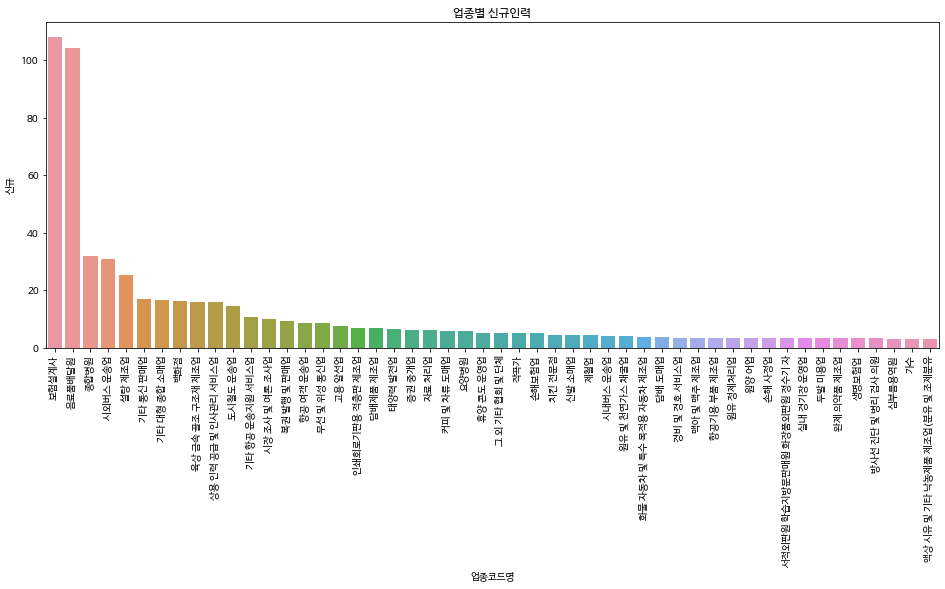

In [110]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_top50.index, y=df_top50)
plt.title('업종별 신규인력')
plt.xticks(rotation=90)
plt.show()

- 코로나 바이러스 이전 사태와는 면밀한 비교를 위하여 이전 데이터가 필요합니다.
- 하지만, 포스트 코로나 현상황에서는 **보험설계사, 음료품배달업, 종합병원, 시외버스 운송업, 설탕 제조업** 순으로 채용이 증가되었음을 확인할 수 있습니다.

In [111]:
df_2 = df.groupby('업종코드명')['상실'].mean()

In [112]:
df_bot50 = df_2.sort_values(ascending=False).head(50)

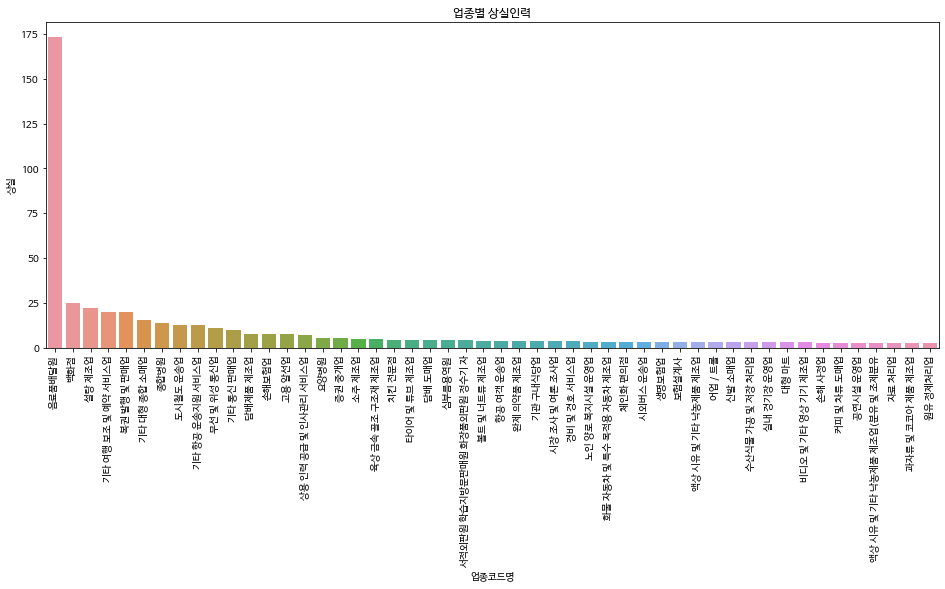

In [113]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_bot50.index, y=df_bot50)
plt.title('업종별 상실인력')
plt.xticks(rotation=90)
plt.show()

업종별 상실 인력에 대한 **TOP 50 결과**입니다.

여기서 재밌는 점은, 이전에 신규인력이 가장 많은 업종도 **음료품배달원** 이었다는 점입니다. 

좀 더 구체적인 데이터를 통해서 신규와 상실이 동시에 많이 일어난 이유에 대한 분석이 면밀히 필요합니다.

때론, 한 기업이 M&A를 진행된 후 타 회사로 인력이 **상실 -> 편입 되면서 데이터 인사이트에 대한 왜곡 현상**이 생길 수 있습니다.

## 업종별 단일 회사 연봉 비교 차트 그리기

In [114]:
def compare_and_visualize(company):
    code = df[df['사업장명'] == company]['업종코드']
    cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실', '업종코드']
    filtered = df.loc[df['업종코드']==code.item()][cols]
    df_company = df.loc[df['사업장명'] == company][cols]
    df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
    
    compare_cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실']
    for col in compare_cols:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=[company, '업종평균'], y=col, data=df_company)
        plt.title('{} vs 업종평균'.format(col), fontsize=18)
        plt.show()

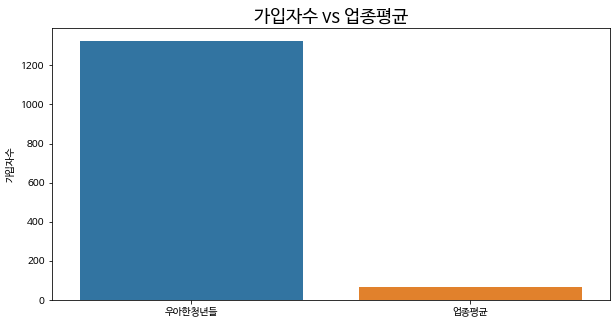

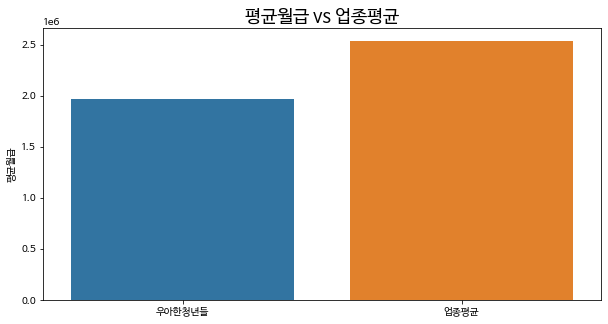

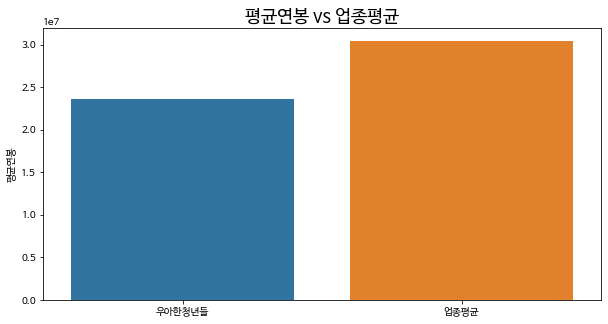

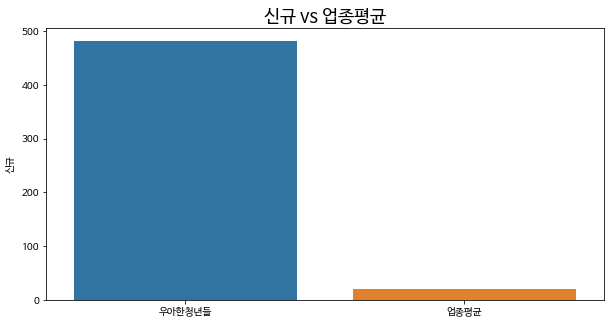

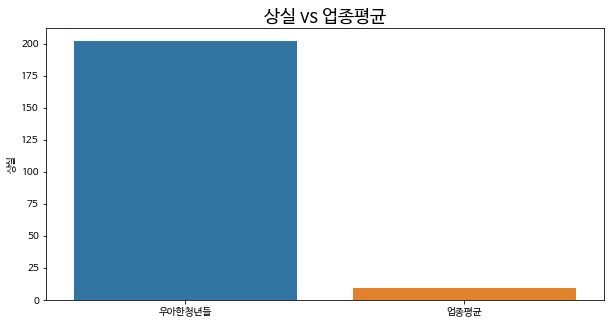

In [144]:
compare_and_visualize('우아한청년들')